### This indicator attemps to capture key price levels where maximum volume was orberved in the market in a given Timeframe

### This information can be used to find next price targets after the stock price broke this level

## The rules for trading from this indicator can be found in the youtube video - https://www.youtube.com/watch?v=kFmxXfgQ4Kw&t=439s

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# ___library_import_statements___
import pandas as pd


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

%matplotlib inline

In [4]:
import quandl

### Use your own API key from Quandl.
### You can signup here - https://www.quandl.com/sign-up. Once you obtain teh API key paste it here for fetching the stock data

In [88]:
quandl.ApiConfig.api_key = 'Your API key'


In [ ]:
### PASTE the stock code that you want to fetch from BOMBAY stock exchange.
### FOR example if you want the data for BAJAJ FINANCE, You will need its BSE CODE (BOM500034). Google search BAJAJ FINANCE BSE Symbol and you will get the 

In [92]:
df_hdfc = quandl.get('BSE/BOM500034', start_date='2019-1-01', end_date = '2020-10-8' )

In [93]:
df_hdfc = df_hdfc.reset_index()

In [94]:
df_hdfc

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2019-01-01,2641.05,2661.60,2613.50,2656.20,2642.25,58530.0,3132.0,154650744.0,10739.0,18.35,48.10,15.15
1,2019-01-02,2646.80,2662.00,2605.00,2616.50,2633.96,94235.0,4296.0,248211350.0,13527.0,14.35,57.00,-30.30
2,2019-01-03,2615.00,2648.00,2575.95,2587.95,2614.09,78983.0,3975.0,206468605.0,16741.0,21.20,72.05,-27.05
3,2019-01-04,2587.95,2612.00,2564.85,2579.25,2585.56,63791.0,3237.0,164935382.0,7973.0,12.50,47.15,-8.70
4,2019-01-07,2590.00,2605.00,2546.60,2552.65,2571.06,45801.0,2078.0,117757064.0,8129.0,17.75,58.40,-37.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2020-10-01,3400.00,3458.65,3317.60,3444.05,3406.43,139142.0,13704.0,473977578.0,31892.0,22.92,141.05,44.05
435,2020-10-05,3460.00,3518.00,3370.00,3379.85,3430.34,179206.0,19027.0,614738295.0,31736.0,17.71,148.00,-80.15
436,2020-10-06,3440.00,3480.00,3392.05,3474.40,3445.63,175471.0,12730.0,604608791.0,41446.0,23.62,87.95,34.40
437,2020-10-07,3415.00,3415.00,3286.00,3331.20,3335.14,237856.0,27525.0,793283633.0,63519.0,26.70,129.00,-83.80


### Price

C:\Users\a400491\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\a400491\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\a400491\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'Price')

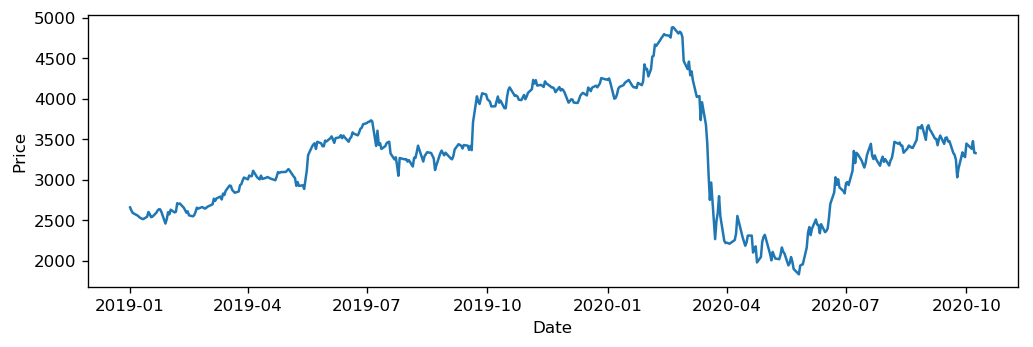

In [95]:
plt.figure(figsize=(10, 3), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(df_hdfc.Date, df_hdfc.Close)
plt.xlabel('Date')
plt.ylabel('Price')

## Volume distribution

Text(0, 0.5, 'Price')

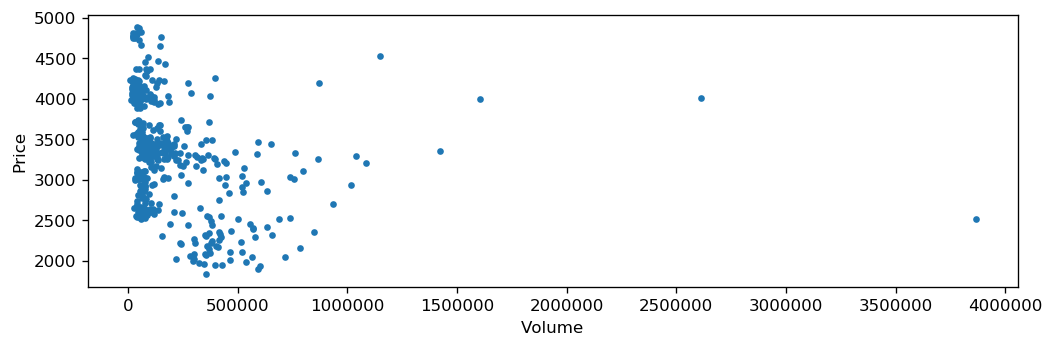

In [96]:
plt.figure(figsize=(10, 3), dpi= 120, facecolor='w', edgecolor='k')
plt.scatter(df_hdfc['No. of Shares'], df_hdfc.Close, alpha=1, marker='.')
plt.xlabel('Volume')
plt.ylabel('Price')

In [97]:
start_price = df_hdfc['Close'].min()
stop_price = df_hdfc['Close'].max()


low = start_price
# delta means granularity in volume aggregation range, it is delta in price
# the volume corresponds to price
delta = (stop_price - start_price)/1000    # here we are splitting whole price range into blocks
high = 0

idx_array = []
vol_array = []
low_array = []

while high < stop_price:
    volume = 0    
    high = low + delta
    
    sub_df = df_hdfc.loc[df_hdfc['Close'].between(low, high, inclusive=False)]
    low_array.append(low)

    for i in sub_df.index.values:
        #print(i)
        #print(df.iloc[i]['Adj_Close'])
        #print(df.iloc[i]['Volume'])
        volume = volume + df_hdfc.iloc[i]['No. of Shares']
    #print('total partial volume: ', volume)
            
    vol_array.append(volume)
    low = high

#print('final vol_array: ', vol_array)    
    
for idx, var in enumerate(vol_array):
    #print("{}: {}".format(idx, var))
    idx_array.append(idx)

In [98]:
#minimum price
print('start_price', start_price)

#maximum price
print('stop_price', stop_price)

start_price 1829.9
stop_price 4880.7


C:\Users\a400491\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\a400491\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\a400491\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


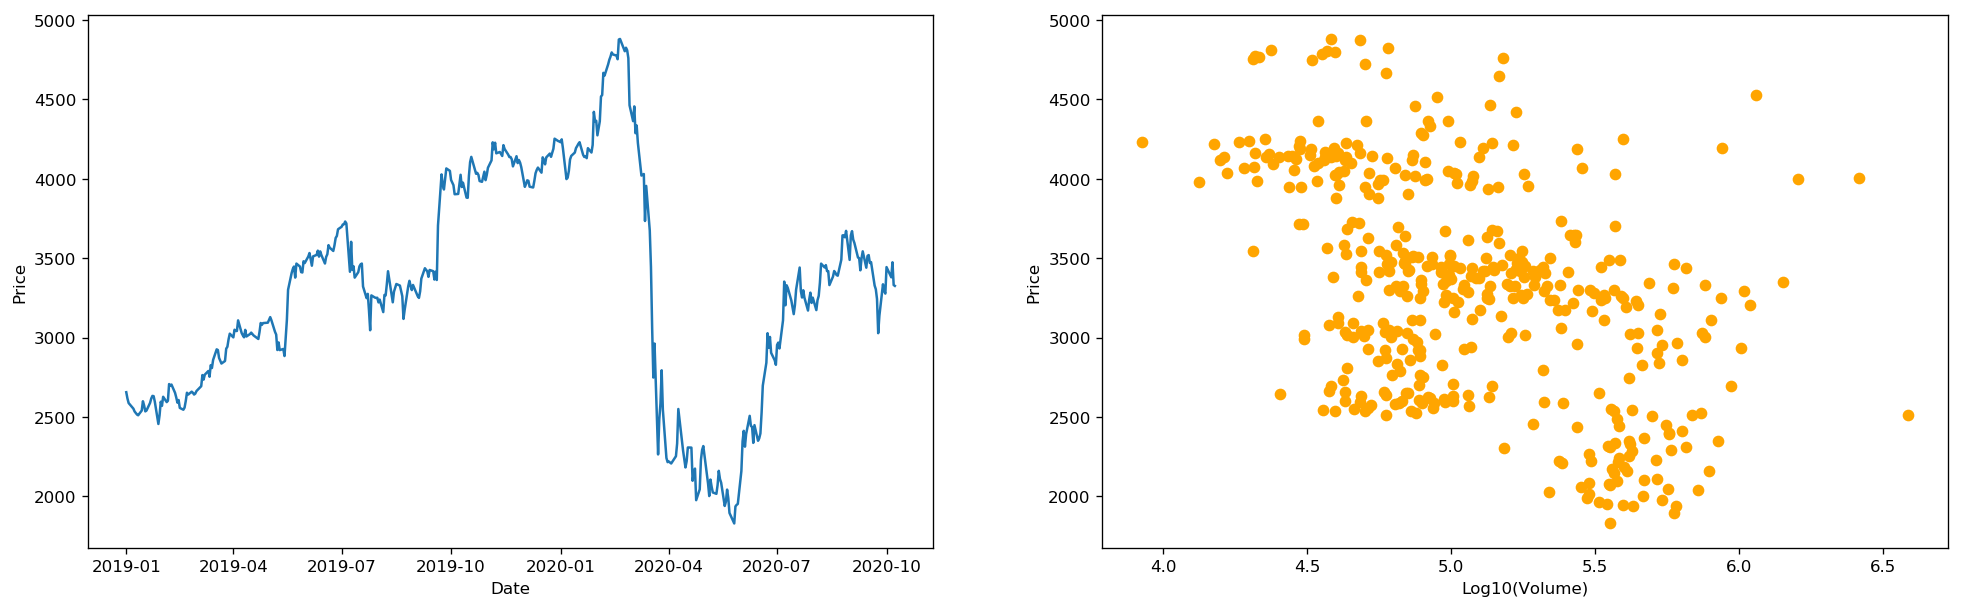

In [99]:
#price and corresponding volume 
plt.figure(figsize=(20, 20), dpi= 120, facecolor='w', edgecolor='k')

plt.subplot(321)
plt.plot(df_hdfc.Date, df_hdfc.Close)
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(322)
plt.scatter(np.log10(df_hdfc['No. of Shares']), df_hdfc.Close, alpha=1, color='orange')
plt.xlabel('Log10(Volume)')
plt.ylabel('Price')

plt.show()

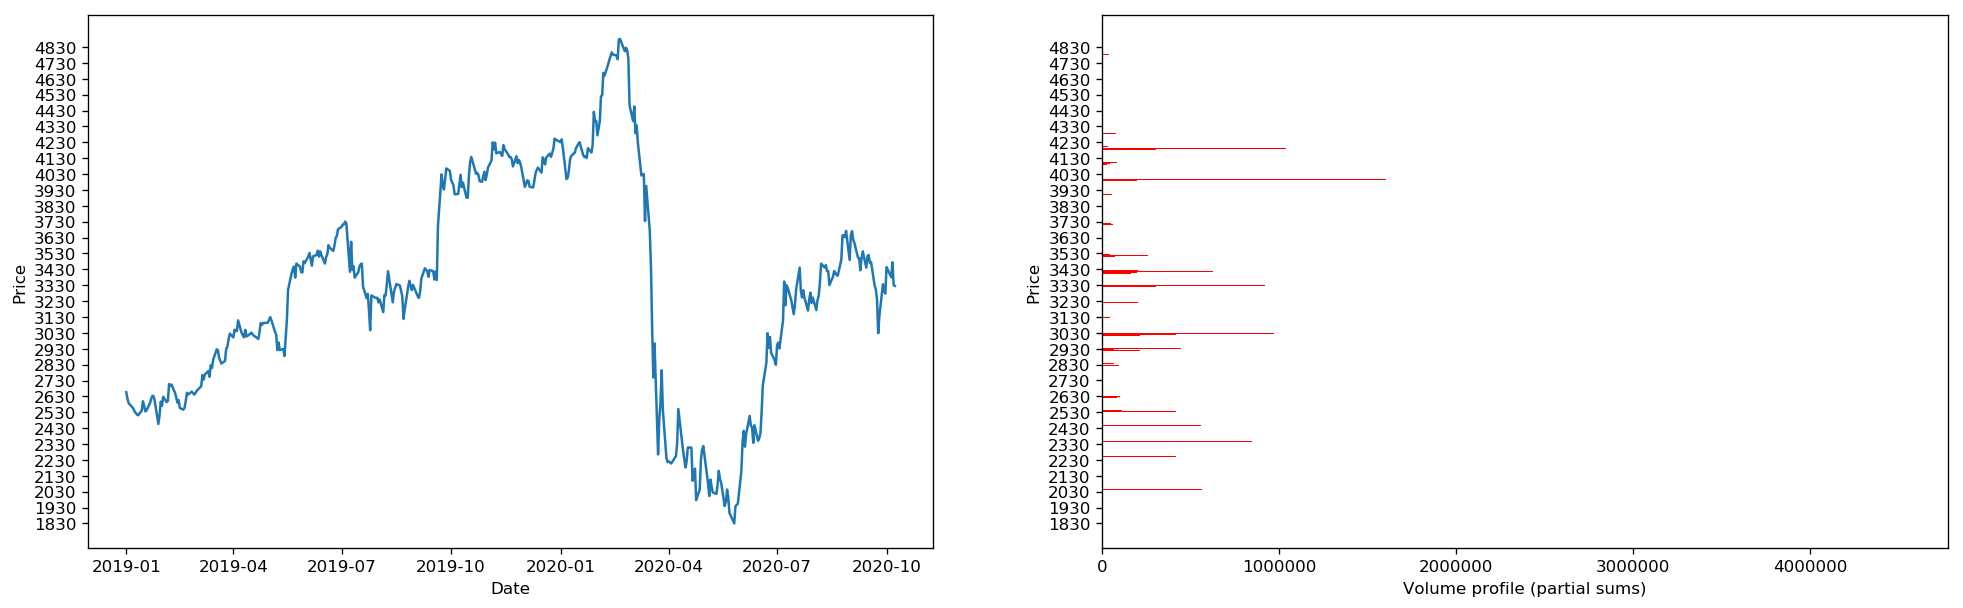

In [102]:
plt.figure(figsize=(20, 20), dpi= 120, facecolor='w', edgecolor='k')



plt.subplot(321)
plt.plot(df_hdfc.Date, df_hdfc.Close)
plt.yticks(np.arange(start_price, stop_price, 100))
plt.xlabel('Date')
plt.ylabel('Price')


plt.subplot(322)
plt.barh(low_array, vol_array, alpha = 1, color='red')
plt.yticks(np.arange(start_price, stop_price, 100))
plt.xlabel('Volume profile (partial sums)')
plt.ylabel('Price')

plt.show()

### From the volume graph on teh right we observe 3330 as price level where significant volume of shares got traded. 
### The next price level is 3430 is price moves up or if price moves below 3330 it will fall to 3030

### Happy Trading! 